In [1]:
import os
import sys
sys.path.append('/Users/aghavamp/Desktop/Projects')
sys.path.append('/Users/aghavamp/Desktop/Projects/Functional_Fusion')
sys.path.append('/Users/aghavamp/Desktop/Projects/SUITPy')
import getpass
import importlib
import tqdm

import scipy.io as sio
import rsatoolbox as rsa
from rsatoolbox.io import spm as spm_io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import surfAnalysisPy as surf
# import SUITPy as suit
import nibabel as nb
import nitools as nt
from matplotlib.cm import ScalarMappable
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from pathlib import Path
import seaborn as sns
import PcmPy as pcm
import Functional_Fusion.atlas_map as am
import Functional_Fusion.reliability as rel
import glob
import matplotlib.patches as patches

# SET PATHS:
baseDir = os.path.join('/Users', getpass.getuser(), 'Desktop', 'Projects', 'bimanual_wrist', 'data', 'fMRI')
bidsDir = 'BIDS'
anatomicalDir = 'anatomicals'
freesurferDir = 'surfaceFreesurfer'
surfacewbDir = 'surfaceWB' 
behavDir = 'behavioural'
regDir = 'ROI'
atlasDir = '/Volumes/diedrichsen_data$/data/Atlas_templates/fs_LR_32'



## ResMs ON SURFACE

In [4]:
glm = 1
participants = [101,102,103,104,106,107,108,109,110,111,112,113,114,115]

for sn in participants:
    ResMs = list(Path(os.path.join(baseDir, f'glm{glm}', f's{sn}')).glob(f'ResMS.nii')) 
    if len(ResMs) == 0:
        raise ValueError(f'No ResMs files found for s{sn} glm{glm}')

    # 2. Define the relevant gifti files for both left and right hemisphere:
    surf_white = [] # White -gray matter surface 
    surf_pial = []  # Pial surface
    surf_sulc = []  # Sulcal depth 
    hemN = ['L','R']
    for h,hem in enumerate(hemN):
        surf_white.append(os.path.join(baseDir,surfacewbDir, f's{sn}', f's{sn}.{hem}.white.32k.surf.gii'))
        surf_pial.append(os.path.join(baseDir,surfacewbDir, f's{sn}', f's{sn}.{hem}.pial.32k.surf.gii'))
        surf_sulc.append(os.path.join(baseDir,surfacewbDir, f's{sn}', f's{sn}.{hem}.sulc.32k.shape.gii'))

    # Map a Nifti to the surface of left hemisphere 
    DL = surf.map.vol_to_surf(ResMs,surf_pial[0], surf_white[0], excludeThres=0.9)
    # Map a Nifti to the surface of right hemisphere 
    DR = surf.map.vol_to_surf(ResMs,surf_pial[1],surf_white[1],  excludeThres=0.9)
    
    D = {'L':DL, 'R':DR}

    Hem = ['L', 'R']
    region_names = ['?', 'S1', 'M1', 'PMd', 'PMv', 'SMA', 'V1', 'SPLa', '?']
    borders = {'L': '/Users/aghavamp/Desktop/Projects/surfAnalysisPy/standard_mesh/fs_L/fs_LR.32k.L.border',
            'R': '/Users/aghavamp/Desktop/Projects/surfAnalysisPy/standard_mesh/fs_R/fs_LR.32k.R.border'}

    # Combine data from both hemispheres
    all_data = np.concatenate([D['L'].flatten(), D['R'].flatten()])
    # Use percentiles to avoid outliers
    vmin = np.nanpercentile(all_data,1)
    vmax = np.nanpercentile(all_data, 80)

    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    for ax, H in zip(axs, Hem):
        plt.sca(ax)
        surf.plot.plotmap(D[H], f'fs32k_{H}',
                            underlay=None,
                            borders=borders[H],
                            cscale=[vmin, vmax],
                            cmap='jet',
                            underscale=[-1.5, 1],
                            alpha=.5,
                            new_figure=False,
                            colorbar=False,
                            # frame=[xlim[0], xlim[1], ylim[0], ylim[1]]
                            )
    # make colorbar
    norm = plt.Normalize(vmin=vmin, vmax=vmax)
    sm = ScalarMappable(norm=norm, cmap='jet')
    cbar = fig.colorbar(sm, ax=[axs[0], axs[1]], orientation='horizontal', fraction=0.03)
    cbar.set_label('ResMs')

    axs[0].set_title('Left hemisphere')
    axs[1].set_title('Right hemisphere')
    fig.suptitle(f'ResMs, s{sn} glm{glm}')
    fig.tight_layout()
    plt.savefig(f'../figures/tmaps/bmw_ResMs_sn{sn}_glm{glm}.pdf', bbox_inches="tight")
    plt.close()


/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: divide by zero encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: overflow encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: invalid value encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: divide by zero encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: overflow encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.cond

/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: divide by zero encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: overflow encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: invalid value encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: divide by zero encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: overflow encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.cond

/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: divide by zero encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: overflow encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: invalid value encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: divide by zero encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: overflow encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.cond

/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: divide by zero encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: overflow encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: invalid value encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: divide by zero encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: overflow encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.cond

/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: divide by zero encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: overflow encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: invalid value encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: divide by zero encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: overflow encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.cond

/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: divide by zero encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: overflow encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: invalid value encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: divide by zero encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: overflow encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.cond

/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: divide by zero encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: overflow encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: invalid value encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: divide by zero encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: overflow encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.cond

/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: divide by zero encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: overflow encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: invalid value encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: divide by zero encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: overflow encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.cond

/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: divide by zero encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: overflow encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: invalid value encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: divide by zero encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: overflow encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.cond

/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: divide by zero encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: overflow encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: invalid value encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: divide by zero encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: overflow encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.cond

/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: divide by zero encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: overflow encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: invalid value encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: divide by zero encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: overflow encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.cond

/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: divide by zero encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: overflow encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: invalid value encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: divide by zero encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: overflow encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.cond

/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: divide by zero encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: overflow encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: invalid value encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: divide by zero encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: overflow encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.cond

/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: divide by zero encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: overflow encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: invalid value encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: divide by zero encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.conda/lib/python3.11/site-packages/nitools/volume.py:47: RuntimeWarning: overflow encountered in matmul
  y = M[0:3,0:3] @ x + M[0:3,3:]
/Users/aghavamp/Desktop/Projects/bimanual_wrist/.cond

## T-MAPS left, right, bimanual

In [ ]:
glm = 1
participants = [101,102,103,104,106,107,108,109,110,111,112,113,114,115]
conds = ['lhand', 'rhand', 'bi']
Hem = ['L', 'R']
region_names = ['?', 'S1', 'M1', 'PMd', 'PMv', 'SMA', 'V1', 'SPLa', '?']
borders = {'L': '/Users/aghavamp/Desktop/Projects/surfAnalysisPy/standard_mesh/fs_L/fs_LR.32k.L.border',
    'R': '/Users/aghavamp/Desktop/Projects/surfAnalysisPy/standard_mesh/fs_R/fs_LR.32k.R.border'}

for cond in conds:
    DL_avg = np.zeros((32492, 1))
    DR_avg = np.zeros((32492, 1))
    for cnt, sn in enumerate(participants):
        spmTs = [os.path.join(baseDir, f'glm{glm}', f's{sn}', f'spmT_{cond}.nii')]
        if len(spmTs) == 0:
            raise ValueError(f'No spmT files found for s{sn} glm{glm} {cond}')
        
        # 2. Define the relevant gifti files for both left and right hemisphere:
        surf_white = [] # White -gray matter surface 
        surf_pial = []  # Pial surface
        surf_sulc = []  # Sulcal depth 
        hemN = ['L','R']
        for h,hem in enumerate(hemN):
            surf_white.append(os.path.join(baseDir,surfacewbDir, f's{sn}', f's{sn}.{hem}.white.32k.surf.gii'))
            surf_pial.append(os.path.join(baseDir,surfacewbDir, f's{sn}', f's{sn}.{hem}.pial.32k.surf.gii'))
            surf_sulc.append(os.path.join(baseDir,surfacewbDir, f's{sn}', f's{sn}.{hem}.sulc.32k.shape.gii'))

        # Map a Nifti to the surface of left hemisphere 
        DL = surf.map.vol_to_surf(spmTs,surf_pial[0], surf_white[0], excludeThres=0.9)
        # Map a Nifti to the surface of right hemisphere 
        DR = surf.map.vol_to_surf(spmTs,surf_pial[1],surf_white[1],  excludeThres=0.9)

        DL_avg += DL/len(participants)
        DR_avg += DR/len(participants)

        D = {'L':DL, 'R':DR}

        # Combine data from both hemispheres
        all_data = np.concatenate([D['L'].flatten(), D['R'].flatten()])
        # Use percentiles
        # vmin = np.nanpercentile(all_data,20)
        vmax = np.nanpercentile(all_data, 99)
        vmin = -vmax
        
        fig, axs = plt.subplots(1, 2, figsize=(12, 6))
        for ax, H in zip(axs, Hem):
            plt.sca(ax)
            surf.plot.plotmap(D[H].mean(axis=1), f'fs32k_{H}',
                                underlay=None,
                                borders=borders[H],
                                cscale=[vmin, vmax],
                                cmap='jet',
                                underscale=[-1.5, 1],
                                alpha=.5,
                                new_figure=False,
                                colorbar=False,
                                # frame=[xlim[0], xlim[1], ylim[0], ylim[1]]
                                )
        # make colorbar
        norm = plt.Normalize(vmin=vmin, vmax=vmax)
        sm = ScalarMappable(norm=norm, cmap='jet')
        cbar = fig.colorbar(sm, ax=[axs[0], axs[1]], orientation='horizontal', fraction=0.03)
        cbar.set_label('t-value')

        axs[0].set_title('Left hemisphere')
        axs[1].set_title('Right hemisphere')
        fig.suptitle(f'avg t-maps, s{sn}, glm{glm}, {cond}')
        fig.tight_layout()
        plt.savefig(f'../figures/tmaps/bmw_tmap_sn{sn}_glm{glm}_{cond}.pdf', bbox_inches="tight")
        if cnt == 0:
            plt.close()
        else:
            plt.close()

    D = {'L':DL_avg, 'R':DR_avg}
    all_data = np.concatenate([DL_avg.flatten(), DR_avg.flatten()])
    # Use percentiles
    # vmin = np.nanpercentile(all_data,20)
    vmax = np.nanpercentile(all_data, 99)
    vmin = -vmax
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    for ax, H in zip(axs, Hem):
        plt.sca(ax)
        surf.plot.plotmap(D[H].mean(axis=1), f'fs32k_{H}',
                            underlay=None,
                            borders=borders[H],
                            cscale=[vmin, vmax],
                            cmap='jet',
                            underscale=[-1.5, 1],
                            alpha=.5,
                            new_figure=False,
                            colorbar=False,
                            # frame=[xlim[0], xlim[1], ylim[0], ylim[1]]
                            )
    # make colorbar
    norm = plt.Normalize(vmin=vmin, vmax=vmax)
    sm = ScalarMappable(norm=norm, cmap='jet')
    cbar = fig.colorbar(sm, ax=[axs[0], axs[1]], orientation='horizontal', fraction=0.03)
    cbar.set_label('t-value')

    axs[0].set_title('Left hemisphere')
    axs[1].set_title('Right hemisphere')
    fig.suptitle(f'avg t-maps, s{sn}, glm{glm}, {cond}')
    fig.tight_layout()
    plt.savefig(f'../figures/tmaps/bmw_tmap_avg_glm{glm}_{cond}.pdf', bbox_inches="tight")

## T-MAPS every condition

In [47]:
glm = 1
participants = [101,102,103,104,106,107,108,109,110,111,112,113,114,115]
conds = ['lhand', 'rhand', 'bi']

for cnt, sn in enumerate(participants):
    spmT_names = sorted(glob.glob(os.path.join(baseDir, f'glm{glm}', f's{sn}', "spmT_*.nii")))
    for spmT in spmT_names:
        # 2. Define the relevant gifti files for both left and right hemisphere:
        surf_white = [] # White -gray matter surface 
        surf_pial = []  # Pial surface
        surf_sulc = []  # Sulcal depth 
        hemN = ['L','R']
        for h,hem in enumerate(hemN):
            surf_white.append(os.path.join(baseDir,surfacewbDir, f's{sn}', f's{sn}.{hem}.white.32k.surf.gii'))
            surf_pial.append(os.path.join(baseDir,surfacewbDir, f's{sn}', f's{sn}.{hem}.pial.32k.surf.gii'))
            surf_sulc.append(os.path.join(baseDir,surfacewbDir, f's{sn}', f's{sn}.{hem}.sulc.32k.shape.gii'))

        # Map a Nifti to the surface of left hemisphere
        DL = surf.map.vol_to_surf([spmT],surf_pial[0], surf_white[0], excludeThres=0.9)
        # Map a Nifti to the surface of right hemisphere
        DR = surf.map.vol_to_surf([spmT],surf_pial[1],surf_white[1],  excludeThres=0.9)

        D = {'L':DL, 'R':DR}

        Hem = ['L', 'R']
        region_names = ['?', 'S1', 'M1', 'PMd', 'PMv', 'SMA', 'V1', 'SPLa', '?']
        borders = {'L': '/Users/aghavamp/Desktop/Projects/surfAnalysisPy/standard_mesh/fs_L/fs_LR.32k.L.border',
                   'R': '/Users/aghavamp/Desktop/Projects/surfAnalysisPy/standard_mesh/fs_R/fs_LR.32k.R.border'}
        
        # Combine data from both hemispheres
        all_data = np.concatenate([D['L'].flatten(), D['R'].flatten()])
        # Use percentiles
        # vmin = np.nanpercentile(all_data,20)
        vmax = np.nanpercentile(all_data, 99)
        vmin = -vmax
        
        fig, axs = plt.subplots(1, 2, figsize=(12, 6))
        for ax, H in zip(axs, Hem):
            plt.sca(ax)
            surf.plot.plotmap(D[H].mean(axis=1), f'fs32k_{H}',
                                underlay=None,
                                borders=borders[H],
                                cscale=[vmin, vmax],
                                cmap='jet',
                                underscale=[-1.5, 1],
                                alpha=.5,
                                new_figure=False,
                                colorbar=False,
                                # frame=[xlim[0], xlim[1], ylim[0], ylim[1]]
                                )
        # make colorbar
        norm = plt.Normalize(vmin=vmin, vmax=vmax)
        sm = ScalarMappable(norm=norm, cmap='jet')
        cbar = fig.colorbar(sm, ax=[axs[0], axs[1]], orientation='horizontal', fraction=0.03)
        cbar.set_label('t-value')

        axs[0].set_title('Left hemisphere')
        axs[1].set_title('Right hemisphere')
        fig.suptitle(f'avg t-maps, s{sn}, glm{glm}, {spmT}')
        fig.tight_layout()
        plt.savefig(f'../figures/tmaps/tmap_glm{glm}_s{sn}_{os.path.splitext(os.path.basename(spmT))[0]}.pdf', bbox_inches="tight")
        if cnt == 0:
            plt.close()
        else:
            plt.close()
        


/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



/var/folders/sc/kmc7_9gn2hqd_lrnhdt_2s580000gn/T/ipykernel_36930/2556735345.py:60: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



## Check ROI definition

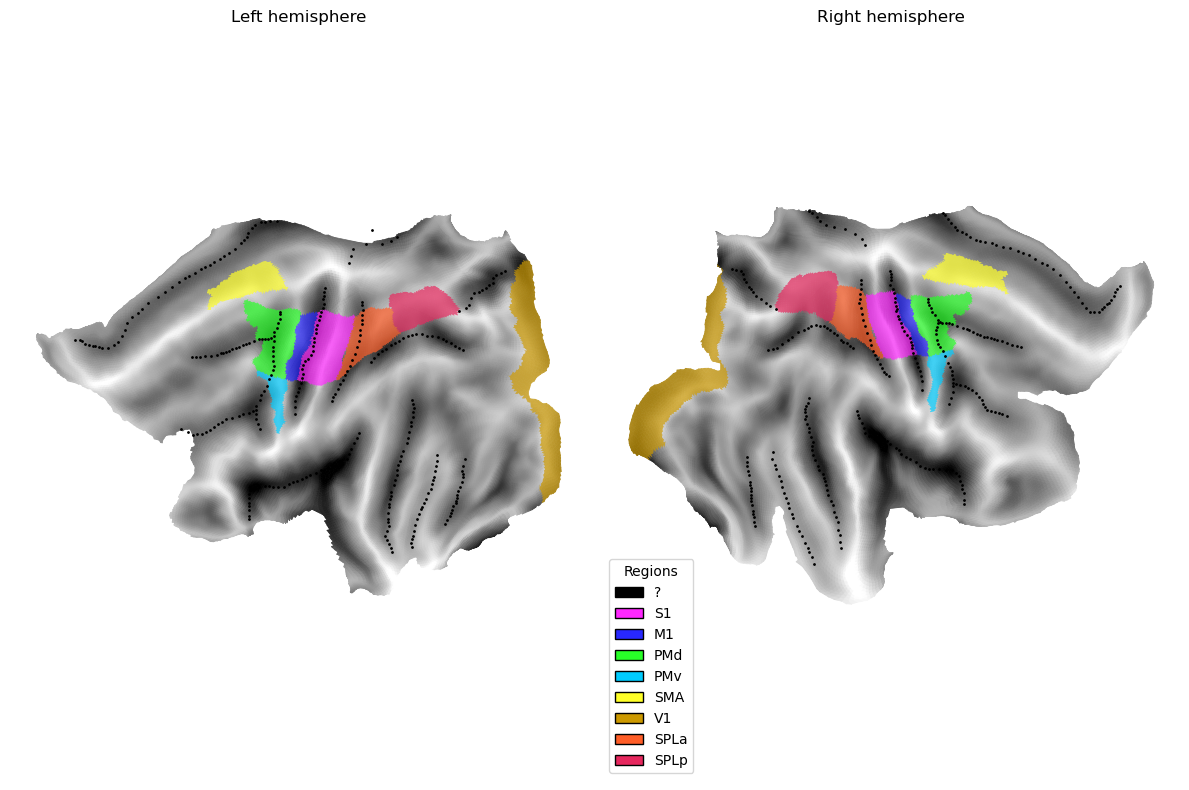

In [ ]:
from matplotlib.patches import Patch

atlas = 'ROI'
Hem = ['L', 'R']
region_names = ['?', 'S1', 'M1', 'PMd', 'PMv', 'SMA', 'V1', 'SPLa', 'SPLp']
borders = {'L': '/Users/aghavamp/Desktop/Projects/surfAnalysisPy/standard_mesh/fs_L/fs_LR.32k.L.border',
           'R': '/Users/aghavamp/Desktop/Projects/surfAnalysisPy/standard_mesh/fs_R/fs_LR.32k.R.border'}
region_colors = np.array([[0.        , 0.        , 0.        ],
                        [1.        , 0.15686275, 1.        ],
                        [0.15686275, 0.15686275, 1.        ],
                        [0.15686275, 1.        , 0.15686275],
                        [0.        , 0.8       , 1.        ],
                        [1.        , 1.        , 0.15686275],
                        [0.8       , 0.6       , 0.        ],
                        [1.        , 0.36862745, 0.15686275],
                        [0.90196078, 0.15686275, 0.36862745]])
fig, axs = plt.subplots(1, 2, figsize=(12, 8))
for ax, H in zip(axs, Hem):
    D = nb.load(os.path.join(atlasDir, f'{atlas}.32k.{H}.label.gii'))
    darray = nt.get_gifti_data_matrix(D)
    plt.sca(ax)
    surf.plot.plotmap(darray, f'fs32k_{H}',
                      underlay=None,
                      borders=borders[H],
                      cmap=region_colors,
                      underscale=[-1.5, 1],
                      alpha=0.5,
                      new_figure=False,
                      colorbar=False,
                      )
axs[0].set_title('Left hemisphere')
axs[1].set_title('Right hemisphere')

legend_elements = [
    Patch(facecolor=color, edgecolor='black', label=name)
    for color, name in zip(region_colors, region_names)
]
plt.legend(handles=legend_elements, loc='lower left', title='Regions')

fig.tight_layout()
plt.savefig(f'../figures/ROI_def.pdf', bbox_inches="tight")
